## **Loading & Organizing Data**

In [ ]:
import pandas as pd

# Load the dataset
df_economy = pd.read_csv('/content/python_analysis_automobiles_economy.csv')

# Convert the 'month' column to datetime and set it as the index
df_economy['month'] = pd.to_datetime(df_economy['month'], format='%m/%y')
df_economy.set_index('month', inplace=True)

# Create dummy variables for each central bank governor
governor_dummies = pd.get_dummies(df_economy['central_bank_governor'], prefix='gov')

# Concatenate the dummy variables with the main dataframe
df_economy = pd.concat([df_economy.drop('central_bank_governor', axis=1), governor_dummies], axis=1)

# Now your df_economy dataframe has the governor dummy variables included
# You can proceed with your analysis using this updated dataframe

# If you want to see the structure of the new dataframe with dummy variables, print the first few rows.
print(df_economy.head())


            inflation_monthly_yoy  inflation_monthly_mom  eur_try_exchange  \
month                                                                        
2015-01-01                  0.092                 0.0110              2.76   
2015-02-01                  0.152                 0.0071              2.81   
2015-03-01                  0.205                 0.0119              2.79   
2015-04-01                  0.085                 0.0163              3.00   
2015-05-01                  0.088                 0.0056              2.92   

            monetary_policy_rate   cci  gov_erdem başçı  gov_murat uysal  \
month                                                                      
2015-01-01                  7.50  90.0                1                0   
2015-02-01                  7.25  89.0                1                0   
2015-03-01                  7.25  86.7                1                0   
2015-04-01                  7.25  87.5                1                0 

## **Exploratory Data Analysis**

**Descriptive Statistics**

In [ ]:
print(df_economy.describe())

       inflation_monthly_yoy  inflation_monthly_mom  eur_try_exchange  \
count              88.000000              88.000000         88.000000   
mean                0.131886               0.015035          6.370455   
std                 0.133127               0.021255          3.386958   
min                -0.120000              -0.014400          2.760000   
25%                 0.058000               0.005675          3.580000   
50%                 0.106000               0.010200          5.905000   
75%                 0.173500               0.016800          7.820000   
max                 0.700000               0.135800         16.230000   

       monetary_policy_rate        cci  gov_erdem başçı  gov_murat uysal  \
count             88.000000  88.000000        88.000000        88.000000   
mean              12.014205  84.771591         0.170455         0.170455   
std                5.521816   6.653423         0.378187         0.378187   
min                6.750000  67.300000

**Line plots**

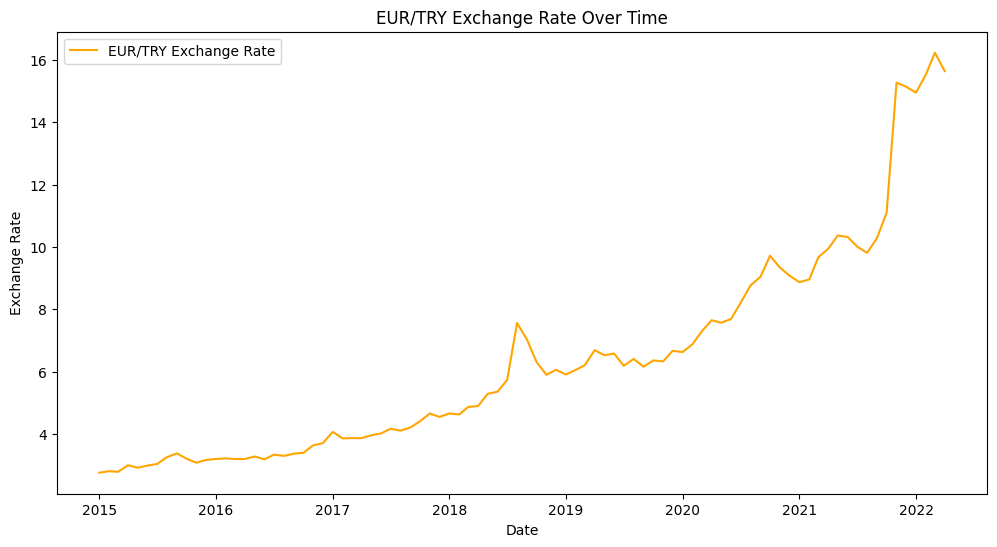

In [ ]:
import matplotlib.pyplot as plt
# Exchange rate
plt.figure(figsize=(12, 6))
plt.plot(df_economy.index, df_economy['eur_try_exchange'], label='EUR/TRY Exchange Rate', color='orange')
plt.title('EUR/TRY Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

***NOTE TO SELF: LOOK FOR THE DATES FOR SPIKES. FOR ALL LINE GRAPHS.***:

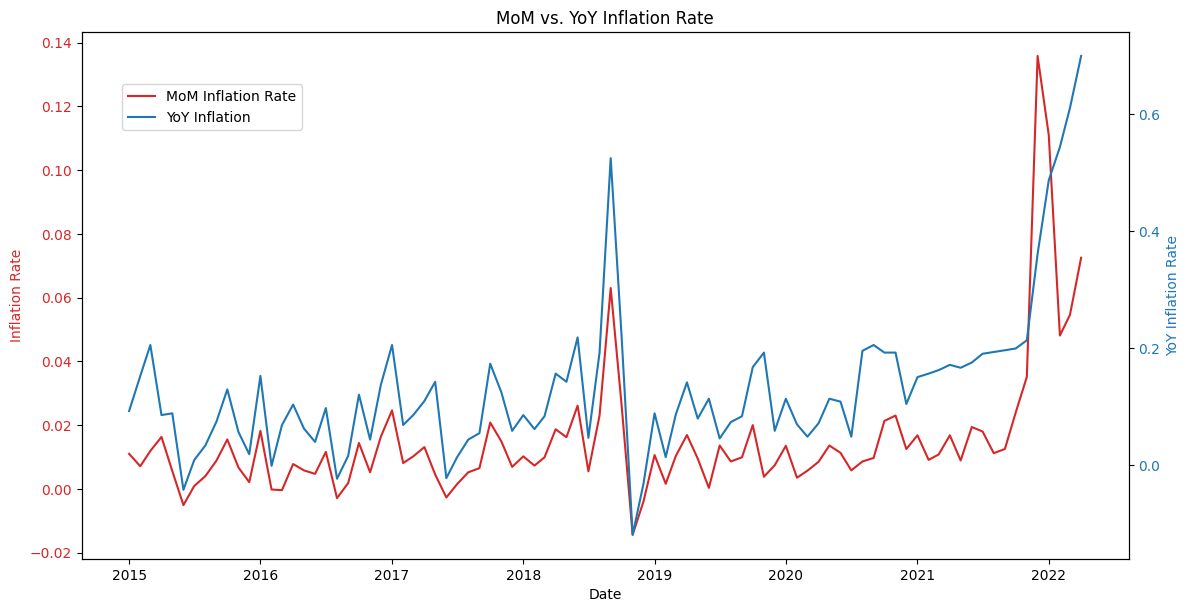

In [ ]:
#Inflation MoM and YoY Graph with Dual Y-Axis

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate', color='tab:red')
ax1.plot(df_economy.index, df_economy['inflation_monthly_mom'], label='MoM Inflation Rate', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('YoY Inflation Rate', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(df_economy.index, df_economy['inflation_monthly_yoy'], label='YoY Inflation', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.title('MoM vs. YoY Inflation Rate')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

I will be proceeding with the Annual Monthly Interest Rate for the purposes of my research. It is more important to capture the details of long-term fluctuations. Although, both seem to act somehow parallel.

***

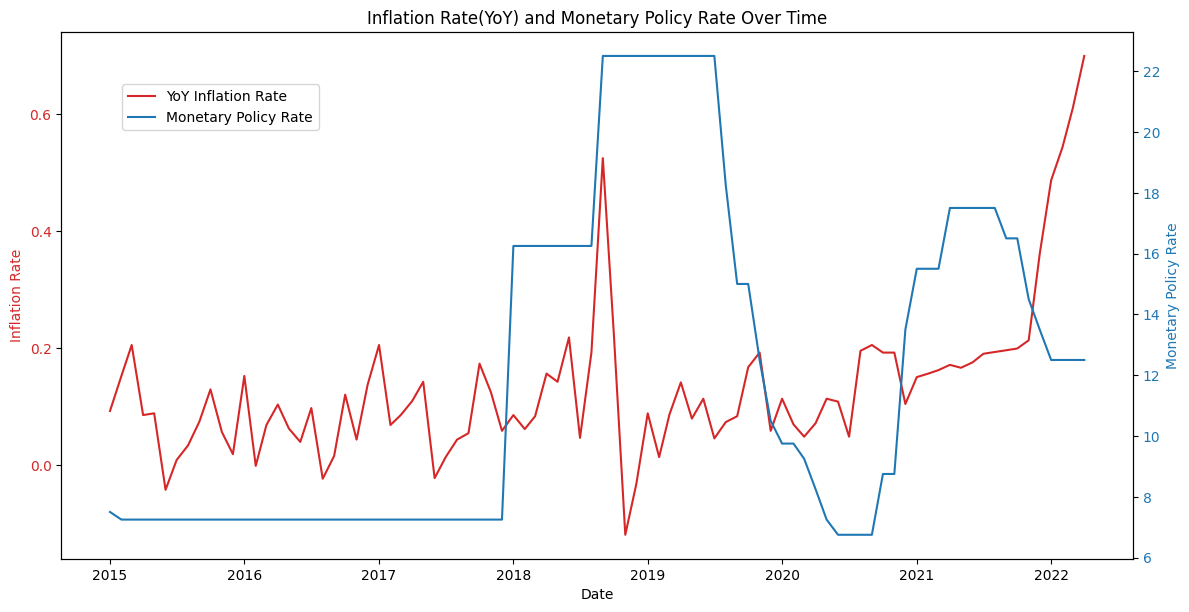

In [ ]:
#Deleting the MoM inflation column since it's no longer necessary.
df_economy.drop('inflation_monthly_mom', axis=1, inplace=True)

#Inflation and Monetary Policy Rate Graph with Dual Y-Axis

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate', color='tab:red')
ax1.plot(df_economy.index, df_economy['inflation_monthly_yoy'], label='YoY Inflation Rate', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Monetary Policy Rate', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(df_economy.index, df_economy['monetary_policy_rate'], label='Monetary Policy Rate', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.title('Inflation Rate(YoY) and Monetary Policy Rate Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


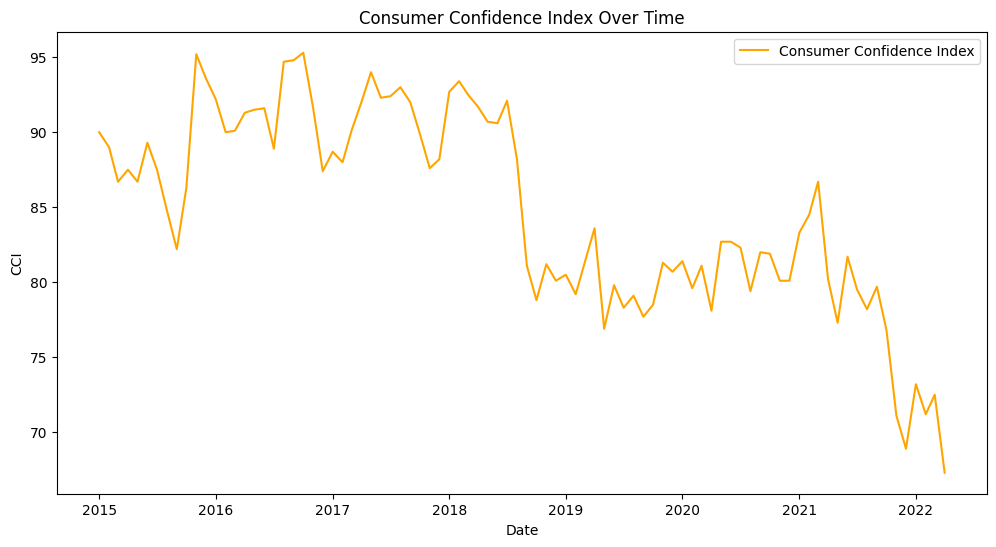

In [ ]:
# CCI
plt.figure(figsize=(12, 6))
plt.plot(df_economy.index, df_economy['cci'], label='Consumer Confidence Index', color='orange')
plt.title('Consumer Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.show()

In [ ]:
# Comparing average inflation rates under each governor
for column in df_economy.columns:
    if column.startswith('gov_'):  # Assuming your dummy variables start with 'gov_'
        print(f"Average YoY inflation under {column}: {df_economy[df_economy[column] == 1]['inflation_monthly_yoy'].mean()}")

Average YoY inflation under gov_erdem başçı: 0.07433333333333333
Average YoY inflation under gov_murat uysal: 0.10586666666666669
Average YoY inflation under gov_murat çetinkaya: 0.09592307692307692
Average YoY inflation under gov_naci ağbal: 0.15933333333333335
Average YoY inflation under gov_şahap kavcıoğlu: 0.32353846153846155


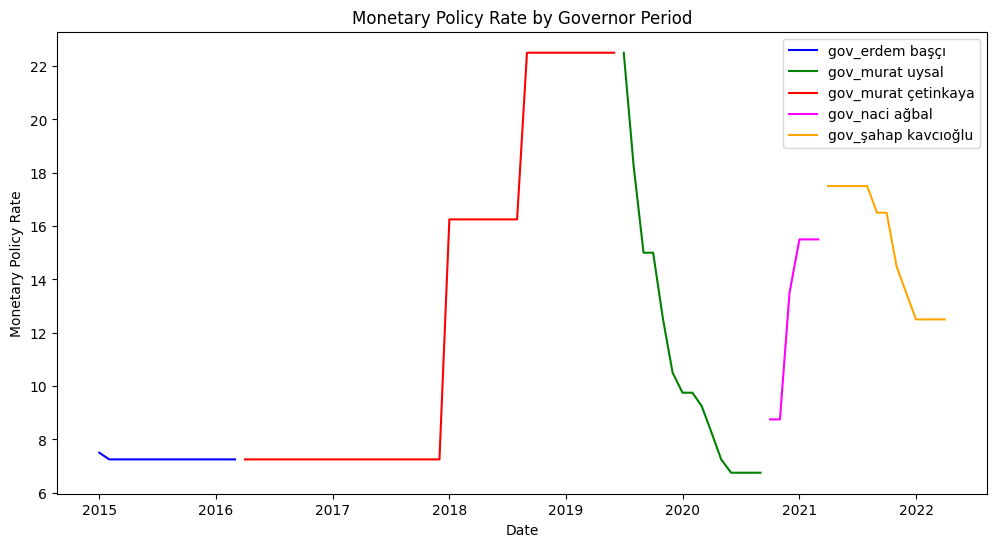

In [ ]:
governor_columns = [col for col in df_economy.columns if col.startswith('gov_')]

# Setting up the plot
plt.figure(figsize=(12, 6))

# Colors for each governor - you may need to adjust this list based on the number of governors
colors = ['blue', 'green', 'red', 'magenta', 'orange']
color_index = 0

for gov in governor_columns:
    # Filter the DataFrame for the period under each governor
    gov_period = df_economy[df_economy[gov] == 1]

    # Plot the monetary policy rate for the governor's period
    plt.plot(gov_period.index, gov_period['monetary_policy_rate'], label=gov, color=colors[color_index])

    # Move to the next color
    color_index += 1

# Finalizing the plot
plt.title('Monetary Policy Rate by Governor Period')
plt.xlabel('Date')
plt.ylabel('Monetary Policy Rate')
plt.legend()
plt.show()


Removing governor dummy columns since we don't need it

In [ ]:
# List of governor dummy columns to exclude
gov_columns_to_exclude = [
    'gov_erdem başçı',
    'gov_murat uysal',
    'gov_murat çetinkaya',
    'gov_naci ağbal',
    'gov_şahap kavcıoğlu'
]

#deleting governor dummy columns
df_economy.drop(columns=gov_columns_to_exclude, inplace=True)

**Histogram and Scatter Plots**

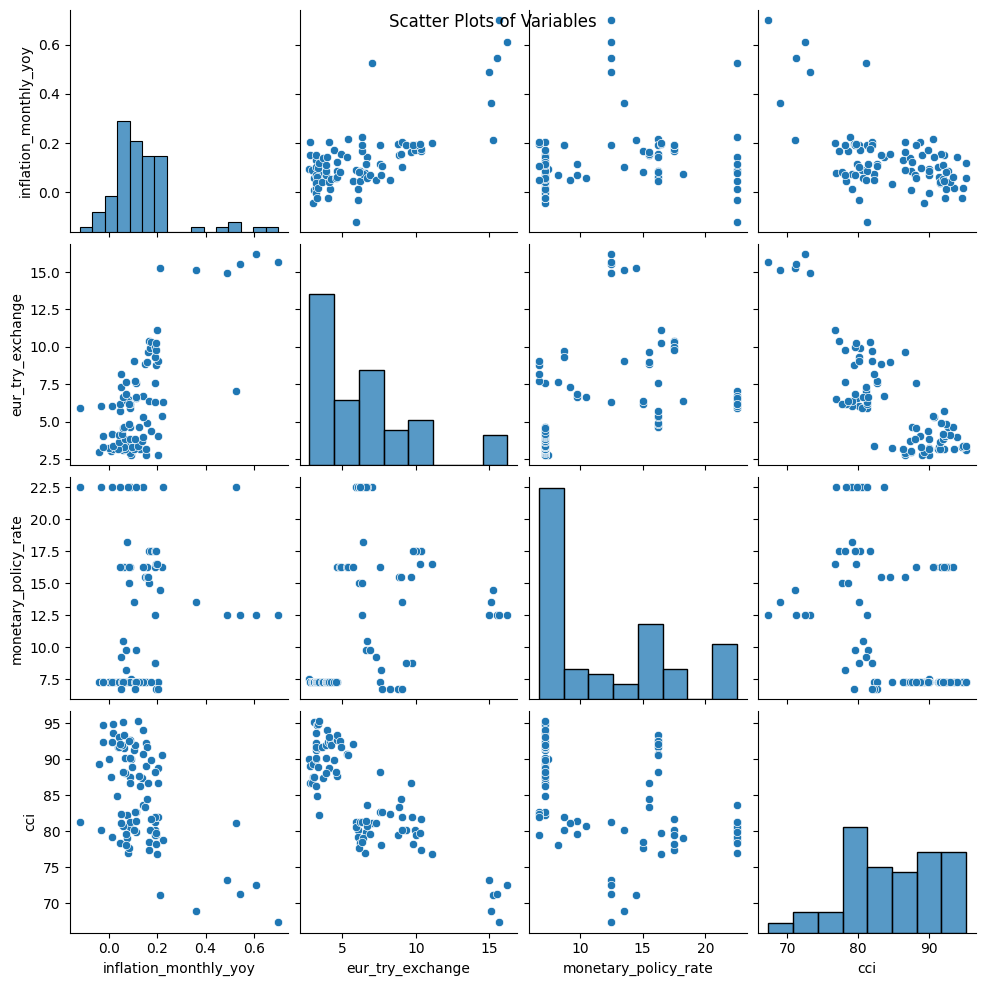

In [ ]:
import seaborn as sns
sns.pairplot(df_economy)
plt.suptitle('Scatter Plots of Variables')
plt.show()

Shapiro-Wilk test for normality

In [ ]:
#The data doesn't really seem normally distributed but checking it anyway.

import scipy.stats as stats

# Shapiro-Wilk Test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df_economy)
alpha = 0.05  # significance level

if shapiro_p_value > alpha:
    print("Shapiro-Wilk Test: Data seems to be normally distributed (fail to reject H0)")
else:
    print("Shapiro-Wilk Test: Data does not seem to be normally distributed (reject H0)")

Shapiro-Wilk Test: Data does not seem to be normally distributed (reject H0)


**Spearman's rank correlation matrix**

In [ ]:
# Calculating Spearman's rank correlation for the DataFrame
spearman_correlation_matrix = df_economy.corr(method='spearman')

print(spearman_correlation_matrix)

                       inflation_monthly_yoy  eur_try_exchange  \
inflation_monthly_yoy               1.000000          0.555681   
eur_try_exchange                    0.555681          1.000000   
monetary_policy_rate                0.227244          0.525267   
cci                                -0.442295         -0.737090   

                       monetary_policy_rate       cci  
inflation_monthly_yoy              0.227244 -0.442295  
eur_try_exchange                   0.525267 -0.737090  
monetary_policy_rate               1.000000 -0.499019  
cci                               -0.499019  1.000000  


In [1]:
!pwd


/content


Inflation and TRY/EUR exchange rate have a strong positive correlation (0.821792), indicating that higher inflation often corresponds with a weaker Lira.

There is a significant positive correlation between inflation and the monetary policy rate (0.702444), suggesting that the central bank raises interest rates as a response to rising inflation.

Consumer confidence is negatively correlated with inflation (-0.661164) and the TRY/EUR exchange rate (-0.737090), showing that as inflation and currency depreciation increase, consumer confidence tends to drop.

The negative correlation between the monetary policy rate and consumer confidence (-0.499019) implies that higher interest rates, which make borrowing more expensive, can lower consumer sentiment.
***